# **Unveiling Borrower Patterns: Applying Clustering to Loan Approval Prediction Dataset**

Clustering is a technique in machine learning where similar data points are grouped together based on certain characteristics, aiming to discover underlying patterns and structures within the dataset without predefined labels. Now, let's discuss applying clustering to a loan dataset, which is available on Kaggle at this link:https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset.

In [1]:
# Install packages
install.packages("factoextra")
install.packages("cluster")
install.packages("dbscan")

# Load libraries
library(dbscan)
library(cluster)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# Set seed for reproducibility
set.seed(1234)

In [3]:
# Read the loan dataset from the specified file path
dataLoan <- read.csv("/content/sample_data/loan_approval_dataset_original.csv")
head(dataLoan)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
6,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected


In [4]:
# Data Preprocessing checking null  values
missing_values_count <- colSums(is.na(dataLoan))
missing_values_count


loan_id         no_of_dependents                education 
                       0                        0                        0 
           self_employed             income_annum              loan_amount 
                       0                        0                        0 
               loan_term              cibil_score residential_assets_value 
                       0                        0                        0 
 commercial_assets_value      luxury_assets_value         bank_asset_value 
                       0                        0                        0 
             loan_status 
                       0

In [5]:
# Data Preprocessing checking duplicate values
duplicated_rows <- which(duplicated(dataLoan))
duplicated_rows

integer(0)

In [6]:
# Define original categorical labels
original_labels <- c(" Not Graduate", " Graduate")

# Convert 'education' to numeric values
dataLoan$education <- as.numeric(factor(dataLoan$education, levels = original_labels))

# Convert 'self_employed' to numeric values
dataLoan$self_employed <- as.numeric(factor(dataLoan$self_employed))

# Convert 'loan_status' to numeric values
dataLoan$loan_status <- as.numeric(factor(dataLoan$loan_status))

# Check for missing values
summary(dataLoan)


    loan_id     no_of_dependents   education     self_employed  
 Min.   :   1   Min.   :0.000    Min.   :1.000   Min.   :1.000  
 1st Qu.:1068   1st Qu.:1.000    1st Qu.:1.000   1st Qu.:1.000  
 Median :2135   Median :3.000    Median :2.000   Median :2.000  
 Mean   :2135   Mean   :2.499    Mean   :1.502   Mean   :1.504  
 3rd Qu.:3202   3rd Qu.:4.000    3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :4269   Max.   :5.000    Max.   :2.000   Max.   :2.000  
  income_annum      loan_amount         loan_term     cibil_score   
 Min.   : 200000   Min.   :  300000   Min.   : 2.0   Min.   :300.0  
 1st Qu.:2700000   1st Qu.: 7700000   1st Qu.: 6.0   1st Qu.:453.0  
 Median :5100000   Median :14500000   Median :10.0   Median :600.0  
 Mean   :5059124   Mean   :15133450   Mean   :10.9   Mean   :599.9  
 3rd Qu.:7500000   3rd Qu.:21500000   3rd Qu.:16.0   3rd Qu.:748.0  
 Max.   :9900000   Max.   :39500000   Max.   :20.0   Max.   :900.0  
 residential_assets_value commercial_assets_value luxury_asset

In [7]:
# Define the columns to drop
dataLoan <- dataLoan[, setdiff(names(dataLoan), 'loan_id')]

head(dataLoan)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2,2,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,1,2,4100000,12200000,8,417,2700000,2200000,8800000,3300000,2
3,3,2,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,2
4,3,2,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,2
5,5,1,2,9800000,24200000,20,382,12400000,8200000,29400000,5000000,2
6,0,2,2,4800000,13500000,10,319,6800000,8300000,13700000,5100000,2



Within this dataset encompassing 4,269 loan applications and featuring 13 diverse variables, including factors such as dependents, education level, self-employment status, annual income, loan details, and CIBIL score, our exploration focuses on the application of clustering algorithms. The primary aim is to uncover distinct clusters based on these features and assess their alignment with the "loan_status" target variable, indicating loan approval outcomes. Specifically tailored to this loan dataset, our clustering approach involves customer segmentation analysis, grouping individuals with similar traits into distinct clusters. To evaluate the quality of these clusters, we employ external evaluation metrics such as accuracy, precision, and recall. These metrics serve as quantitative measures to gauge the effectiveness of the clustering results in alignment with the predefined class labels. Accuracy measures the overall correctness of assigned clusters in relation to the true class labels. Precision assesses the accuracy of a cluster by calculating the proportion of correctly classified instances within it. Conversely, recall gauges the cluster's ability to capture all relevant instances of a specific class. Through these external evaluation methods, we can quantitatively determine the effectiveness of the clustering approach in accurately segmenting customers based on the provided class labels.

In [8]:
# Display the structure of the loan dataset
str(dataLoan)

'data.frame':	4269 obs. of  12 variables:
 $ no_of_dependents        : int  2 0 3 3 5 0 5 2 0 5 ...
 $ education               : num  2 1 2 2 1 2 2 2 2 1 ...
 $ self_employed           : num  1 2 1 1 2 2 1 2 2 1 ...
 $ income_annum            : int  9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000 800000 1100000 ...
 $ loan_amount             : int  29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000 2200000 4300000 ...
 $ loan_term               : int  12 8 20 8 20 10 4 20 20 10 ...
 $ cibil_score             : int  778 417 506 467 382 319 678 382 782 388 ...
 $ residential_assets_value: int  2400000 2700000 7100000 18200000 12400000 6800000 22500000 13200000 1300000 3200000 ...
 $ commercial_assets_value : int  17600000 2200000 4500000 3300000 8200000 8300000 14800000 5700000 800000 1400000 ...
 $ luxury_assets_value     : int  22700000 8800000 33300000 23300000 29400000 13700000 29200000 11800000 2800000 3300000 ...
 $ bank_asset_value        : int

When Focusing on clustering. The first step involves excluding the target variable
“loan_status” from the dataset. This prepares the subset for clustering analysis by
removing the variable to be predicted. Consequently various clustering algorithms are
applied to this modified subset. The objective is to assess the performance and
effectiveness of different algorithms in grouping similar data points together based on
their attributes, without considering the predefined “loan_status” labels. This approach
allows us to analyze into the inherent patterns and relationships within the data without
being influenced by the target variable, Providing a renewed understanding of the
underlying organization of the dataset.

In [9]:
# Spliting data
data_loan <- dataLoan[,-12]
label_loan <- dataLoan[,12]

# **PCA**

Prior to engaging in clustering, we employed the PCA technique on the loan dataset
(excluding the target variable) to achieve data normalization and optimize the
subsequent clustering process. The summary of the PCA method is presented below.
Notably, there are 11 Principal Components, corresponding to the 10 attributes within
the dataset.

In [10]:
# Perform PCA on the numeric columns of the data
pca <- prcomp(dataLoan[, -12], center = TRUE, scale. = TRUE)

# Display attributes of the PCA object
attributes(pca)

# Print the details of the PCA object
print(pca)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

Standard deviations (1, .., p=11):
 [1] 2.1189359 1.0158544 1.0097522 0.9973775 0.9897475 0.9878756 0.7645537
 [8] 0.7119435 0.4859018 0.3725696 0.2048805

Rotation (n x k) = (11 x 11):
                                   PC1           PC2          PC3          PC4
no_of_dependents          0.0027816837 -0.4702900495 -0.434974666  0.312059679
education                 0.0059642647 -0.4978133965  0.456726220 -0.283606707
self_employed            -0.0001502452  0.3774541414 -0.620070010 -0.074095169
income_annum              0.4593478701  0.0012167027 -0.002107973  0.001753372
loan_amount               0.4405292684  0.0064063813  0.004543278  0.003900567
loan_term                 0.0063740777  0.5512093870  0.262741257 -0.372898844
cibil_score              -0.0129212274  0.2908985129  0.384892747  0.821795192
residential_assets_value  0.3366096587 -0.0038802694 -0.013047153 -0.009288504
commercial_assets_value   0.3401533803 -0.0009517285  0.018037644  0.045691995
luxury_assets_value     

The below summary offers an understanding of the standard deviation, variance
proportion (contribution) of each component, and cumulative proportion (total
participation). The accompanying table highlights that PC1 encompasses 40.82% of
the information, while PC2 encapsulates 9.38%. Remarkably, the cumulative
variance, spanning from PC1 to PC8, encompasses 96.21% of the total information. In
light of this, the decision was made to focus on 8 principal components for further
analysis.

In [11]:
# Display summary of PCA
summary(pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1189 1.01585 1.00975 0.99738 0.98975 0.98788 0.76455
Proportion of Variance 0.4082 0.09381 0.09269 0.09043 0.08905 0.08872 0.05314
Cumulative Proportion  0.4082 0.50199 0.59468 0.68511 0.77416 0.86288 0.91602
                           PC8     PC9    PC10    PC11
Standard deviation     0.71194 0.48590 0.37257 0.20488
Proportion of Variance 0.04608 0.02146 0.01262 0.00382
Cumulative Proportion  0.96210 0.98357 0.99618 1.00000

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

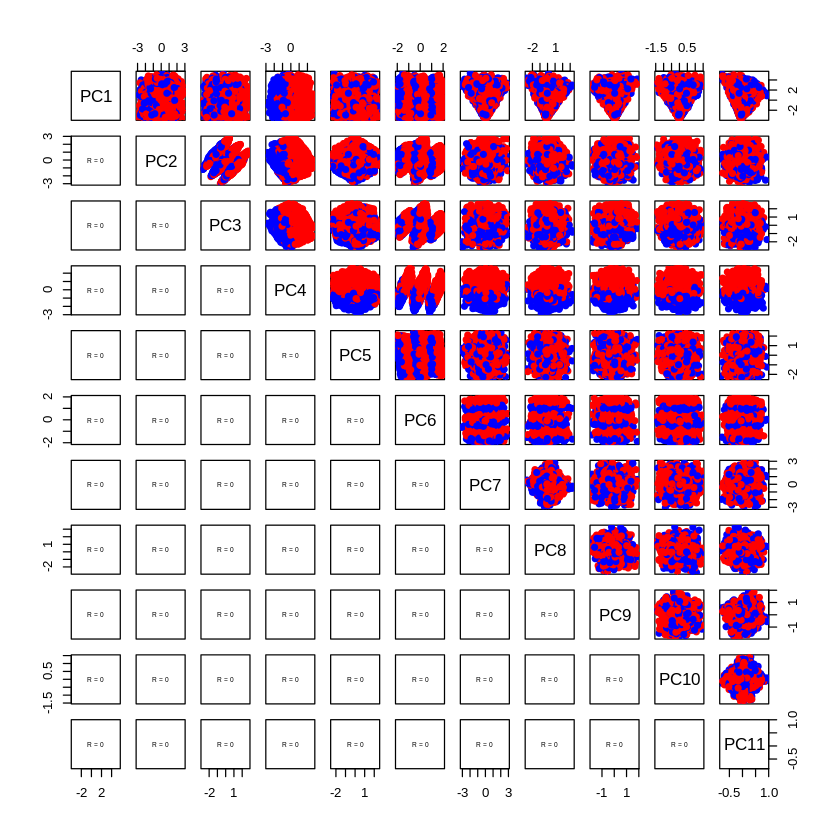

In [12]:
# Fixed cex size
panel.cor <- function(x, y){
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- round(cor(x, y), digits=2)
  txt <- paste0("R = ", r)
  text(0.5, 0.5, txt, cex = 0.5)
}

# Create plot
pairs(pca$x,
      lower.panel = panel.cor,
      upper.panel = function(x, y) {
        my_cols <- c("red", "blue")
        points(x,y, pch = 19, col = my_cols[dataLoan$loan_status])
      })

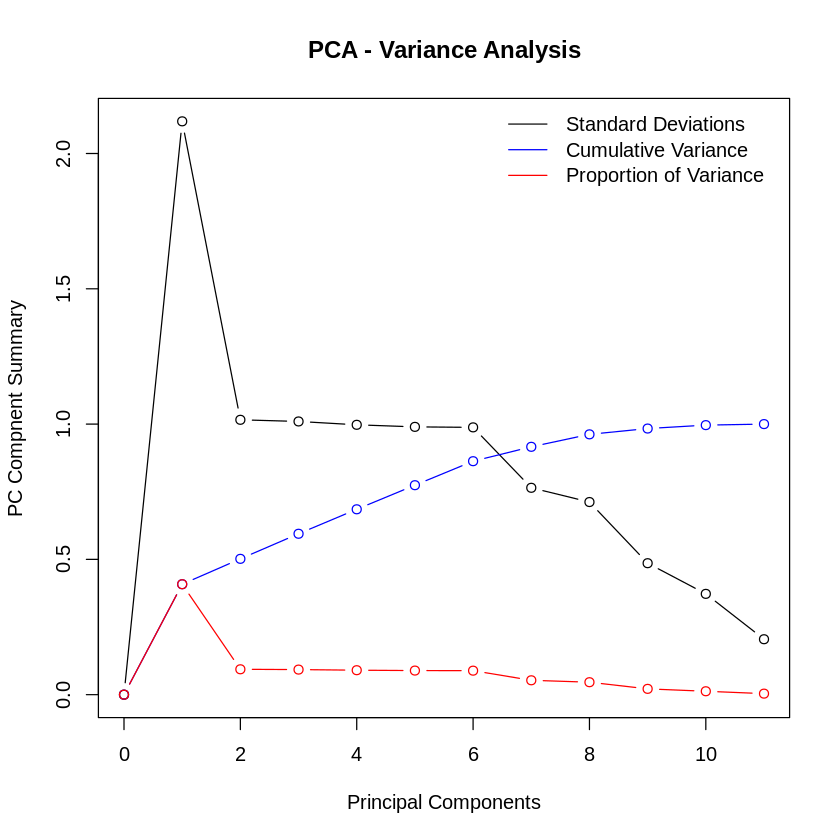

In [13]:
# Extract standard deviations (sqrt of variances)
pc_variances <- sqrt(pca$sdev^2)

# Calculate cumulative proportion of variance
cumulative_var <- cumsum(pc_variances^2) / sum(pc_variances^2)

# Calculate proportion of variance explained by each PC
prop_var <- pc_variances^2 / sum(pc_variances^2)

# Create the combined plot
par(mfrow = c(1, 1))  # Set up a single plot
plot(0:length(pc_variances), c(0, pc_variances), type = "b",
       xlab = "Principal Components", ylab = "PC Compnent Summary",
     main = "PCA - Variance Analysis", xlim = c(0, length(pc_variances)), ylim = c(0, max(pc_variances)))
lines(0:length(cumulative_var), c(0, cumulative_var), type = "b", col = "blue")
lines(0:length(prop_var), c(0, prop_var), type = "b", col = "red")
legend("topright", legend = c("Standard Deviations", "Cumulative Variance", "Proportion of Variance"),
       col = c("black", "blue", "red"), lty = 1, bty = "n")

par(mfrow = c(1, 1))

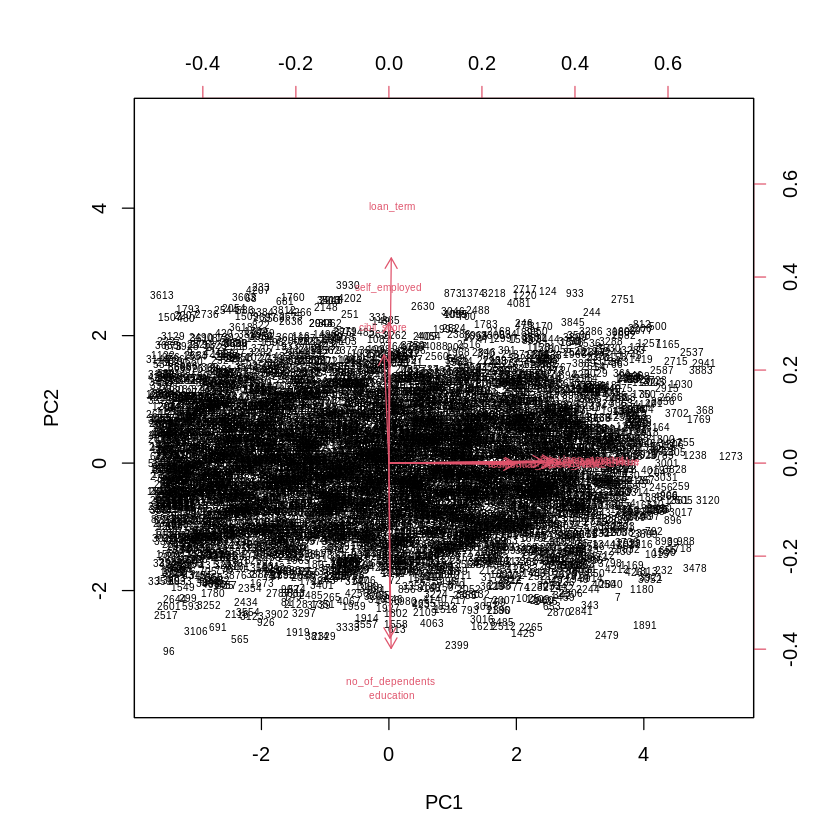

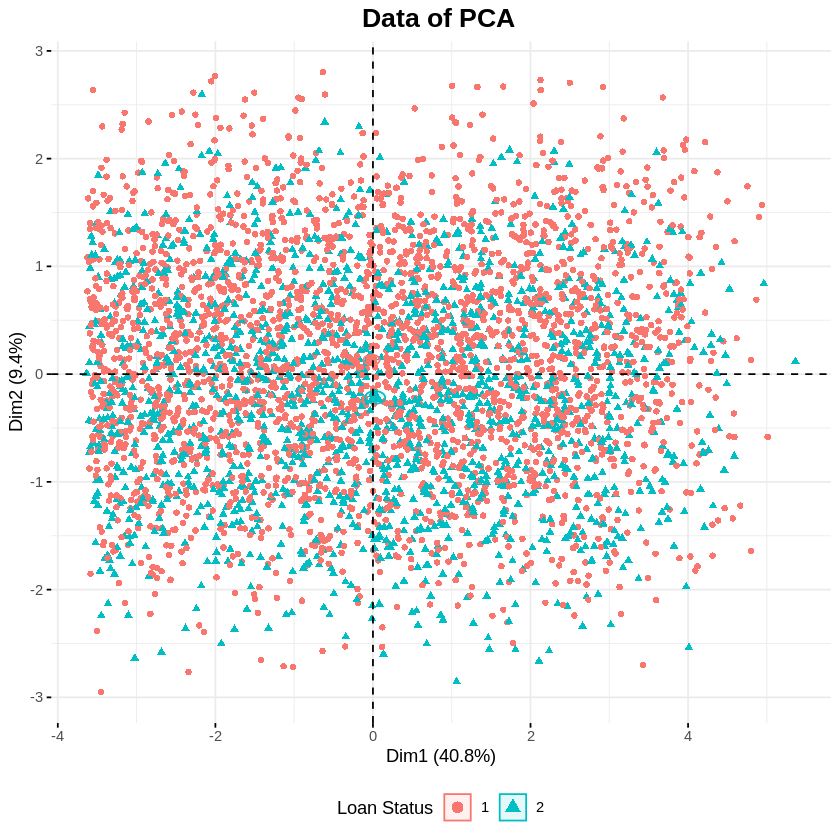

In [14]:
# bio plot
biplot(pca, cex = 0.5, scale = 0)

#Create PCA plot with customized design
pca_plot <- fviz_pca_ind(pca, geom = "point",
                         habillage = dataLoan$loan_status, # Color by loan status
                         addEllipses = TRUE, ellipse.level = 0.95, ellipse.type = "confidence",
                         legend.title = "Loan Status",
                         ggtheme = theme_minimal(),
                         title = "Data of PCA ")


pca_plot +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        legend.position = "bottom", legend.box = "horizontal")

In [15]:
# Extracting principal components from 1 to 8
dataLoan_transform = as.data.frame(-pca$x[,1:8])

# Displaying summary of the transformed data
summary(dataLoan_transform)

      PC1                PC2                 PC3                PC4          
 Min.   :-5.36254   Min.   :-2.801672   Min.   :-2.72268   Min.   :-2.66933  
 1st Qu.:-1.71690   1st Qu.:-0.715333   1st Qu.:-0.72508   1st Qu.:-0.74436  
 Median : 0.02524   Median : 0.006162   Median : 0.01287   Median : 0.01244  
 Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 1.79882   3rd Qu.: 0.709484   3rd Qu.: 0.73648   3rd Qu.: 0.74325  
 Max.   : 3.63347   Max.   : 2.951085   Max.   : 2.77041   Max.   : 2.79624  
      PC5                PC6                 PC7                  PC8          
 Min.   :-2.37486   Min.   :-1.962817   Min.   :-2.8834119   Min.   :-3.28997  
 1st Qu.:-0.71096   1st Qu.:-0.578898   1st Qu.:-0.3744503   1st Qu.:-0.34039  
 Median :-0.00947   Median :-0.007573   Median : 0.0006403   Median : 0.07567  
 Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.0000000   Mean   : 0.00000  
 3rd Qu.: 0.68865   3rd Qu.: 0.550730   3rd Qu.: 0.354

# K-Means

K-means is a popular clustering algorithm in machine learning and unsupervised learning. The algorithm partitions a dataset into a specified number of clusters, where each data point belongs to the cluster with the nearest mean. The "k" in k-means represents the number of clusters that the algorithm aims to identify.


Prior to implementing the K-means algorithm, we employed the within-cluster sum of
squares (WSS) and silhouette methods to identify the optimal value for "k". The
figures below illustrate this process, revealing that "k=2" appears to be a
suitable choice for this dataset.

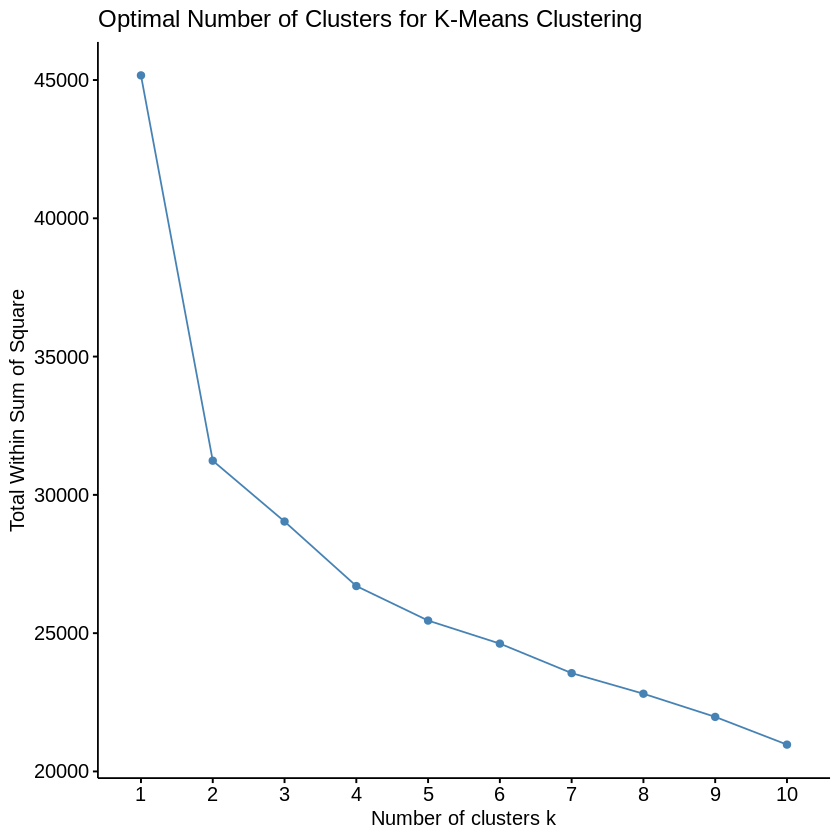

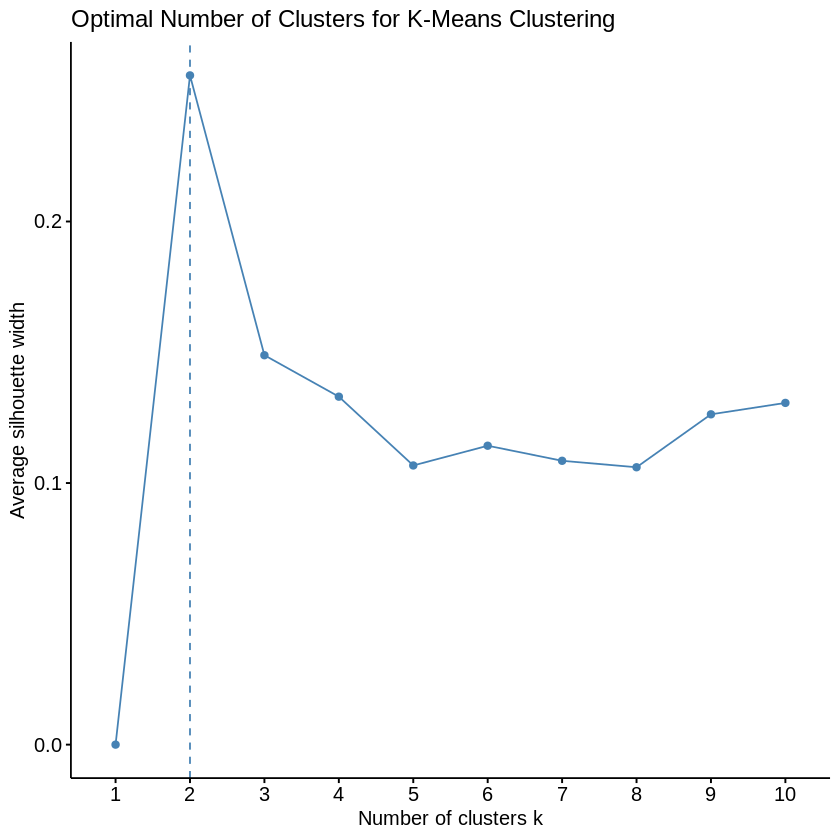

In [16]:
# determine and visualize optimal number of clusters
# Create the plot with the wss method
plot <- fviz_nbclust(dataLoan_transform, kmeans, method = "wss")

# Add a title to the plot
plot + ggtitle("Optimal Number of Clusters for K-Means Clustering")


# Create the plot with the silhouette method
plot <- fviz_nbclust(dataLoan_transform, kmeans, method = "silhouette")

# Add a title to the plot
plot + ggtitle("Optimal Number of Clusters for K-Means Clustering")

we conducted the K-means algorithm with a chosen
value of "k=2," which resulted in two distinct clusters comprising 2161 and 2108 data
points, respectively. The calculated cluster means are also indicated. Additionally, the
values for "between_ss" (13934.79) and "total_ss" (17300.72) contribute to evaluating
the within-cluster sum of squares (WSS), which amounts to 30.8%. This WSS score
reflects the variation or dispersion of data points within each cluster. A lower WSS
score indicates that data points within a cluster are close to each other, suggesting a
more coherent grouping. The visual representation of the WSS score graph aids in
comprehending this measure. In essence, this within-cluster sum of squares
percentage provides insight into the clustering's ability to capture variance within the
clusters, thereby shedding light on the effectiveness of the clustering results.

In [17]:
# create clusters with k-means
fit_km <- kmeans(dataLoan_transform, 2)
fit_km

K-means clustering with 2 clusters of sizes 2108, 2161

Cluster means:
        PC1         PC2          PC3          PC4          PC5          PC6
1 -1.828555  0.02047198  0.003903103 -0.005243280  0.009646836 -0.009226976
2  1.783708 -0.01996989 -0.003807377  0.005114685 -0.009410241  0.009000678
          PC7         PC8
1  0.01461589 -0.03754758
2 -0.01425742  0.03662670

Clustering vector:
   [1] 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 2 2 2
  [38] 1 2 2 1 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 1 1 1
  [75] 2 2 1 1 1 2 2 1 1 2 2 1 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 2
 [112] 1 1 1 1 2 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 [149] 2 2 1 1 1 2 1 2 2 1 2 2 2 2 1 2 1 1 2 2 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 1 2
 [186] 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 2 1 2 1 2 1 1 2 1 1 2 2 1
 [223] 2 2 2 1 1 1 1 2 2 1 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 1 2 2 1 1 1
 [260] 2 2 1 1 1 2 1 2 1 1 2 1 1 1 1

Below figure giving a visualization of two cluster provided by K-means algorithm
with k=2.

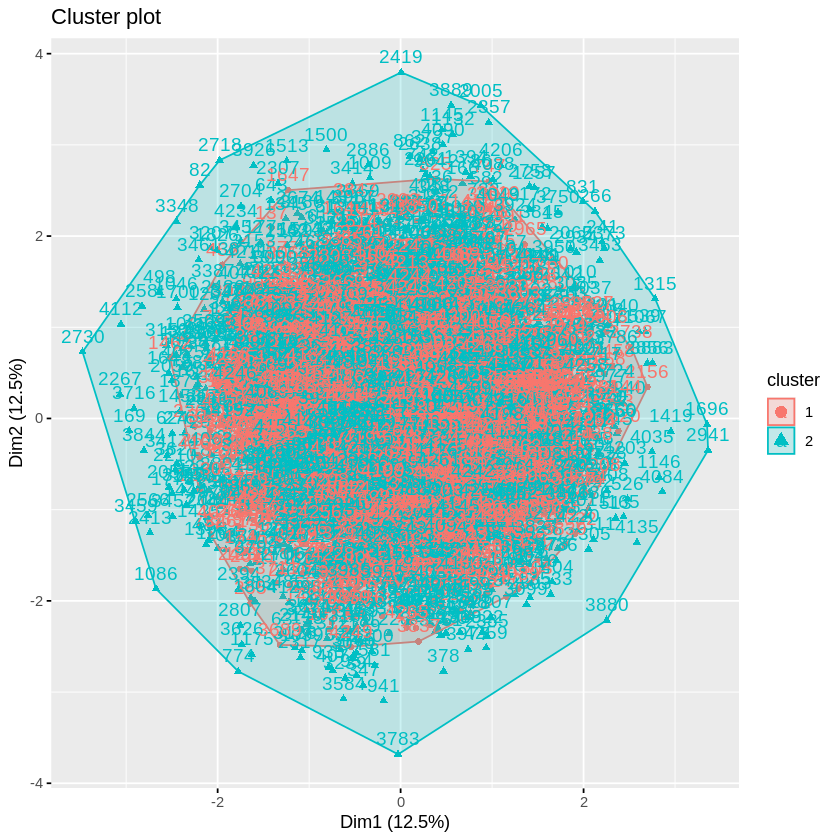

In [18]:
# create cluster biplot
fviz_cluster(kmeans(dataLoan_transform, centers = 2), data = dataLoan_transform)

In [19]:
# get cluster means
aggregate(dataLoan_transform,by = list(fit_km$cluster),FUN = mean)

Group.1,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.828555,0.02047198,0.003903103,-0.005243280,0.009646836,-0.009226976,0.01461589,-0.03754758
2,1.783708,-0.01996989,-0.003807377,0.005114685,-0.009410241,0.009000678,-0.01425742,0.03662670


Based on a careful examination of each cluster in conjunction with the class labels of
the dataset, we constructed a confusion matrix. Additionally, we computed evaluation
metrics to assess the performance of our analysis.

In [20]:
silhouette_score <- silhouette(fit_km$cluster, dist(dataLoan_transform))
overall_silhouette <- mean(silhouette_score[, "sil_width"])

# Calculate within-cluster sum of squares (WSS) score
wss_score <- sum(fit_km$withinss)

In [21]:
# Print silhouette score and WSS score  of K-Means
cat("silhouette_score:",overall_silhouette, "\n")
cat("wss_score:", wss_score, "\n")

silhouette_score: 0.2558497 
wss_score: 31235.51 


In [24]:
# Create a confusion matrix
cm <- table(dataLoan$loan_status, fit_km$cluster)
cm

   
       1    2
  1 1302 1354
  2  806  807

In [25]:
# Calculate true positives, false positives, false negatives, and true negatives
tp <- cm[1, 1]
fp <- cm[2, 1]
fn <- cm[1, 2]
tn <- cm[2, 2]

# Calculate accuracy
accuracy <- (tp + tn) / sum(cm)

# Calculate precision
precision <- tp / (tp + fp)

# Calculate recall (sensitivity)
recall <- tp / (tp + fn)

# Calculate F1 score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the results of K-Means
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.4940267 
Precision: 0.6176471 
Recall: 0.4902108 
F1 Score: 0.5465995 


# **HClustering**

Hierarchical clustering is a type of clustering algorithm used in data analysis and machine learning. It's an unsupervised learning method that groups similar items into clusters based on their features or characteristics. The hierarchical aspect comes from the way it builds a tree-like hierarchy of clusters.

Here's a brief overview of how hierarchical clustering works:

**Agglomerative Method (Bottom-Up):** It starts by considering each data point as a single cluster. Then, it iteratively merges the closest clusters until only one cluster remains. The result is a tree-like structure called a dendrogram.

**Divisive Method (Top-Down):** It begins with all data points in a single cluster and then recursively splits the cluster into smaller clusters until each data point is in its own cluster.

**Distance Metric:** The algorithm uses a distance metric to measure the similarity or dissimilarity between data points. Common metrics include Euclidean distance, Manhattan distance, or correlation.

**Dendrogram:** The output of hierarchical clustering is often visualized as a dendrogram, which represents the hierarchy of clusters. The height at which branches merge in the dendrogram indicates the distance at which clusters were combined.

Hierarchical clustering has the advantage of not requiring a predefined number of clusters, allowing for a more flexible interpretation of the data structure. However, it can be computationally expensive for large datasets.

Before implementing hierarchical clustering, we utilized the silhouette method to
ascertain the optimal number of clusters. The outcome indicated that a two-cluster
solution is preferable for this dataset.

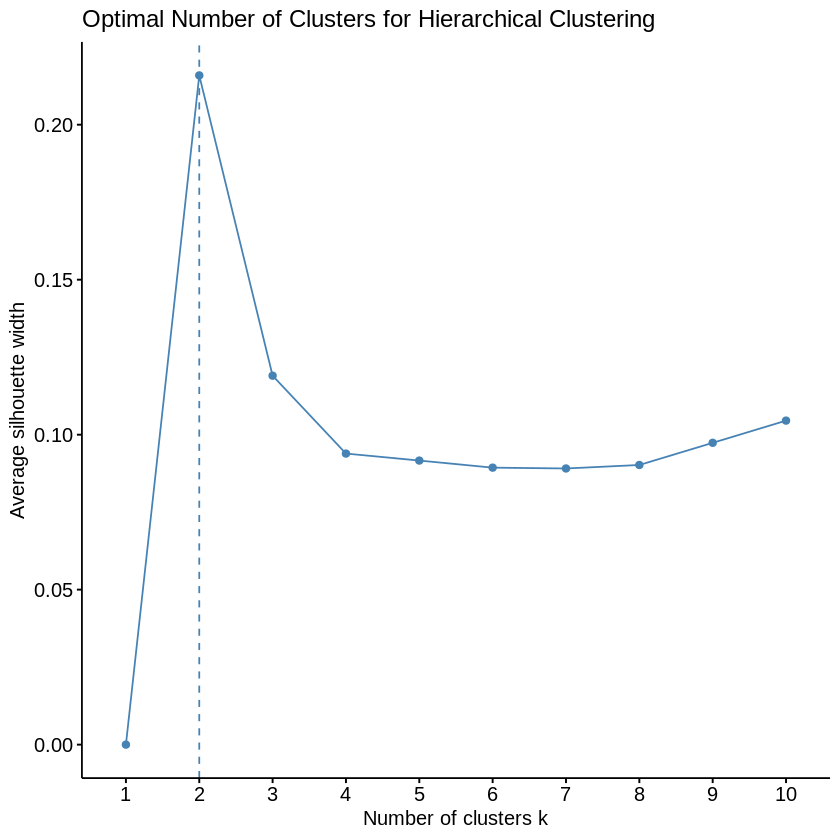

In [26]:
# determine and visualize optimal number of clusters
# Create the plot with the silhouette method
plot <- fviz_nbclust(dataLoan_transform, hcut, method = "silhouette")

# Add a title to the plot
plot + ggtitle("Optimal Number of Clusters for Hierarchical Clustering ")


In this context, we employed hierarchical clustering using the complete linkage
method and computed distances using the Euclidean metric on the provided dataset.

This approach allowed us to identify patterns and relationships within the dataset by
creating a hierarchical structure of clusters based on their similarities.

In [27]:
# Calculate Euclidean distance matrix
res.dist = dist(x = dataLoan_transform, method = "euclidean")

# Cluster dendrogram using stats package
res.hc <- hclust(d = res.dist, method = "complete")
print(res.hc)


Call:
hclust(d = res.dist, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 4269 



Figure below shows the cluster dendrogram with two defined cluster.

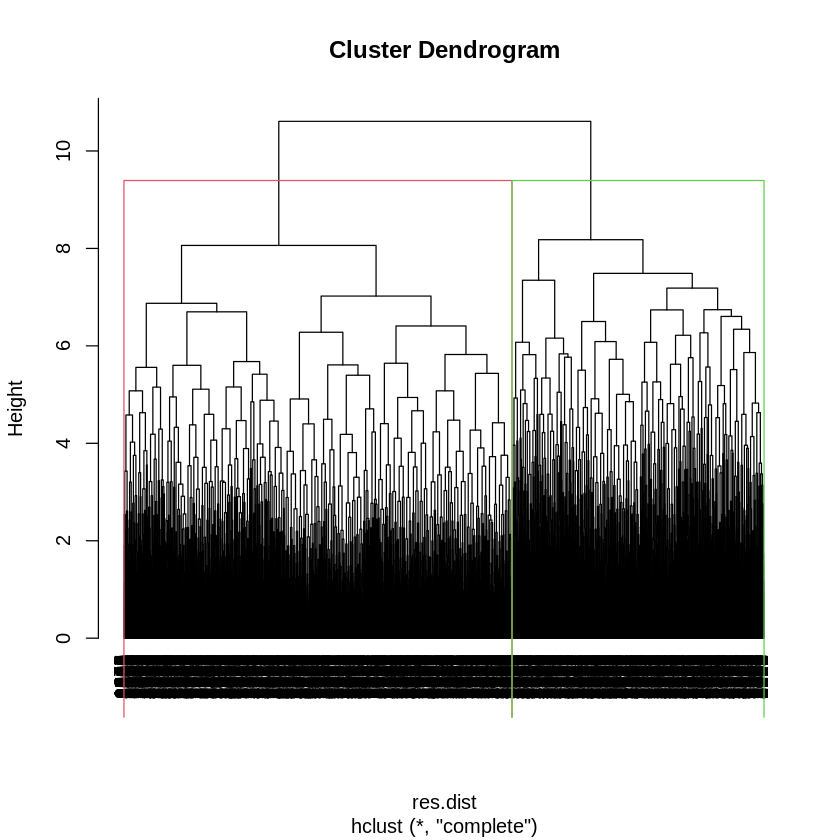

In [28]:
# Contain observattion of each cluster
cut_tree <- cutree(res.hc, k = 2)

# Cluster Plot Observation
plot(res.hc,hang=-1)
rect.hclust(res.hc , k = 2, border = 2:6)

In the following presentation, we offer a confusion matrix derived from the
observation of each cluster and their corresponding class labels. Additionally, the
provided measurement metrics are displayed below.

In [29]:
# Calculate silhouette scores for hierarchical clustering
silhouette_score_hc <- silhouette(cut_tree, dist(dataLoan_transform))

# Calculate the mean silhouette score
silhouette_score <- mean(silhouette_score_hc[, "sil_width"])

# Print the overall silhouette score for hierarchical clustering
cat("silhouette_score:", silhouette_score, "\n")



silhouette_score: 0.2280697 


In [30]:
# Compare the clustering results with the true class labels
cm <- table(dataLoan$loan_status, cut_tree)

# Print the confusion matrix
print(cm)

   cut_tree
       1    2
  1 1151 1505
  2  530 1083


In [31]:
# Calculate true positives, false positives, false negatives, and true negatives
tp <- cm[1, 1]
fp <- cm[2, 1]
fn <- cm[1, 2]
tn <- cm[2, 2]

# Calculate accuracy
accuracy <- (tp + tn) / sum(cm)

# Calculate precision
precision <- tp / (tp + fp)

# Calculate recall (sensitivity)
recall <- tp / (tp + fn)

# Calculate F1 score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the results of Hierarchical clustering,
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")


Accuracy: 0.5233076 
Precision: 0.6847115 
Recall: 0.4333584 
F1 Score: 0.5307816 


# **DBSCAN**

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm in machine learning. It is a density-based algorithm that divides the data points into clusters based on their density in the feature space. Unlike K-means, DBSCAN doesn't require specifying the number of clusters beforehand and can discover clusters of arbitrary shapes.

The main idea behind DBSCAN is to group together data points that are close to each other and have a sufficient number of neighbors within a specified radius. It defines three types of points:

**Core Points**: Data points that have at least a specified number of neighbors within a given radius.

**Border Points**: Data points that have fewer neighbors than the specified threshold but are within the radius of a core point.

**Noise (Outlier) Points:** Data points that are neither core points nor border points.


DBSCAN iteratively forms clusters by connecting core points and their directly reachable neighbors. The algorithm is particularly effective in identifying clusters with varying shapes and handling outliers. The parameters involved are the radius (epsilon) and the minimum number of points required to form a dense region (minPts).



The method employed to identify the optimal 'eps' value involved using the
'kNNdistplot' function with a parameter of 5 for the number of points. By analyzing
the resulting plot, it was evident that the most suitable 'eps' value, referred to as the
optimal epsilon, was determined to be 1.5. This process allowed for the selection of a
distance threshold that facilitated effective DBSCAN clustering, delineating
meaningful clusters within the data.

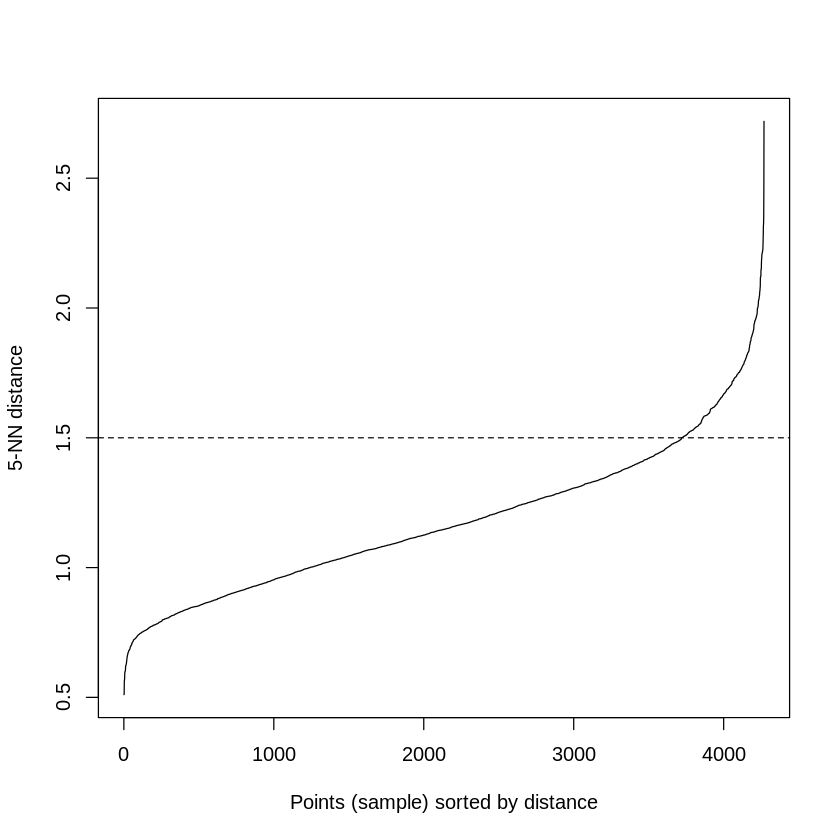

In [45]:
# Obtaining optimal eps value
kNNdistplot(dataLoan_transform, k=5)

# Add a horizontal line at epsilon (1.5) for visualization
abline(h = 1.5, lty=2)

We utilized the DBSCAN method with an epsilon value of 1.5 and a minimum
requirement of 5 data points per cluster. As a result of this configuration, the
clustering process yielded four distinct clusters, with an additional 133 data points
identified as noise.



It's crucial to highlight that discrepancies between the number of clusters produced by a clustering algorithm, such as DBSCAN, and the actual class labels can impact the interpretation of evaluation metrics. This misalignment becomes notably significant when the clustering structure doesn't directly correspond to the true class labels of the dataset. In such cases, traditional evaluation metrics may not accurately reflect the algorithm's performance, emphasizing the need for a careful and context-aware interpretation of clustering results. It underscores the importance of considering domain knowledge and exploring alternative evaluation approaches tailored to the specific characteristics of the data and the goals of the analysis.


Moreover, for points allocated to
clusters, the calculation of the silhouette score offers valuable insights into the
clusters' quality and their degree of separation.

In [46]:
# Density-based clustering with fpc & dbscan
# Setting seed for reproducibility
set.seed(123)

# Applying DBSCAN clustering algorithm
d <- dbscan::dbscan(dataLoan_transform, eps = 1.5, MinPts = 5)

# Printing the results
print(d)


Warning message in dbscan::dbscan(dataLoan_transform, eps = 1.5, MinPts = 5):
“converting argument MinPts (fpc) to minPts (dbscan)!”


DBSCAN clustering for 4269 objects.
Parameters: eps = 1.5, minPts = 5
Using euclidean distances and borderpoints = TRUE
The clustering contains 4 cluster(s) and 133 noise points.

   0    1    2    3    4 
 133 1066 1057 1026  987 

Available fields: cluster, eps, minPts, dist, borderPoints


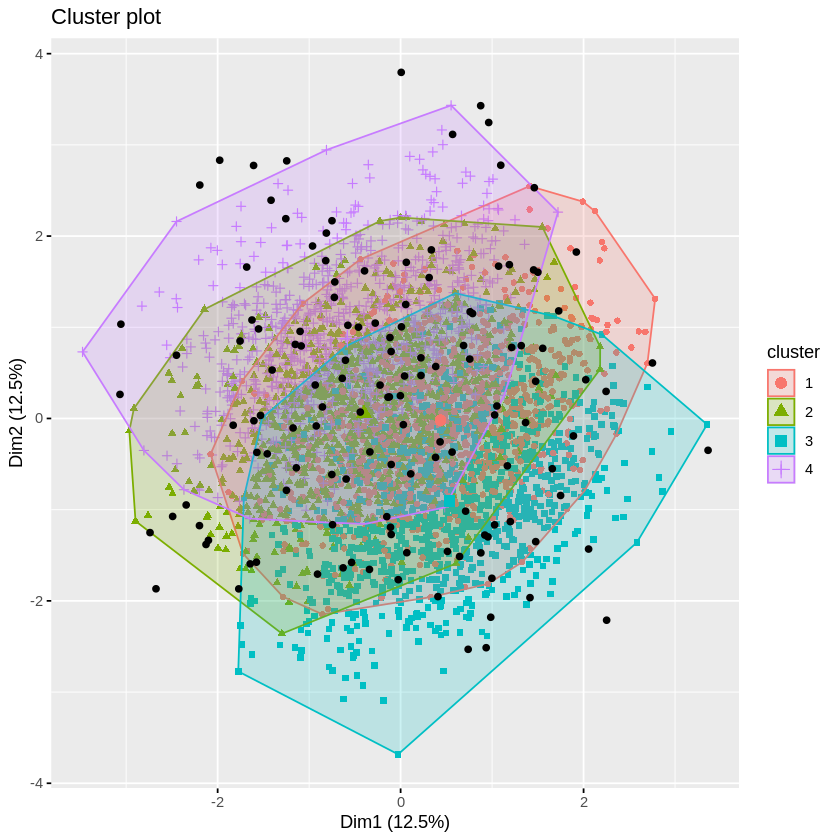

In [47]:
# Cluster visualization
fviz_cluster(d, dataLoan_transform, geom = "point")

In [48]:

# Calculate silhouette scores for each cluster
silhouette_scores <- silhouette(d$cluster, dist(dataLoan_transform))

# Calculate and print average silhouette scores for clusters 1, 2, 3, and 4
for (cluster_id in c(1, 2, 3, 4)) {
  cluster_indices <- which(d$cluster == cluster_id)
  cluster_size <- length(cluster_indices)
  average_silhouette <- mean(silhouette_scores[cluster_indices, "sil_width"])
  cat("Cluster", cluster_id, "Size:", cluster_size, "Average Silhouette Score:", average_silhouette, "\n")
}

overall_silhouette <- mean(silhouette_scores[, "sil_width"])

# Calculate silhouette score for DBSCA
cat(" Silhouette Score:", overall_silhouette, "\n")


Cluster 1 Size: 1066 Average Silhouette Score: 0.08927087 
Cluster 2 Size: 1057 Average Silhouette Score: 0.08981296 
Cluster 3 Size: 1026 Average Silhouette Score: 0.09961321 
Cluster 4 Size: 987 Average Silhouette Score: 0.1002969 
 Silhouette Score: 0.09555218 


# **Results**




# **Discussion of clustering methods based on sollihute score**

| Clustering Method        | Silhouette Score |
|--------------------------|------------------|
| K-Means                  | 0.2558497        |
| Hierarchical Clustering  | 0.2280697        |
| DBscan                   | 0.09555218       |



When comparing different clustering methods using the silhouette score on the loan
dataset, K-Means performs the best with a silhouette score of 0.2558497. Hierarchical
Clustering comes next with a score of 0.2280697, while DBscan has the lowest score
of 0.0955218. This suggests that K-Means is more effective in creating distinct and
well-separated clusters in this loan dataset compared to the other methods. The
relatively lower silhouette score of 0.0955218 indicates that DBscan might not be as
suitable for this particular loan dataset. This could be attributed to the density-based
nature of DBscan, which works well when clusters have similar densities. Therefore,
while K-Means demonstrates stronger clustering performance, DBscan's limitations in
capturing complex cluster structures could impact its effectiveness in this context.



# **The comparison of all algorithms based measurement metrics**

| Methods               | K-Means | Hierarchical Clustering |
|-----------------------|---------|-------------------------|
| Accuracy              | 49.40%  | 52.33%                  |
| Precision             | 61.76%  | 68.47%                  |
| Recall                | 49.02%  | 43.33%                  |
| F1 Score              | 54.65%  | 53.07%                  |



In the comparison of K-Means and Hierarchical Clustering methods, we evaluate their performance using key metrics: Accuracy, Precision, Recall, and F1 Score.

Accuracy: This metric represents the percentage of correctly classified instances. For K-Means, it achieved an accuracy of 49.40%, while Hierarchical Clustering performed slightly better with an accuracy of 52.33%.

Precision: Precision measures the accuracy of positive predictions. In K-Means, it indicates that about 61.76% of instances classified as positive are truly positive. In Hierarchical Clustering, the precision is higher at 68.47%, suggesting a better ability to make accurate positive predictions.

Recall: Recall, also known as Sensitivity or True Positive Rate, quantifies the ability to capture all actual positive instances. K-Means achieved a recall of 49.02%, while Hierarchical Clustering had a recall of 43.33%. This implies that K-Means performed slightly better in identifying true positive instances.

F1 Score: The F1 Score is the harmonic mean of Precision and Recall, providing a balanced measure between the two. In this comparison, K-Means has an F1 Score of 54.65%, and Hierarchical Clustering has a slightly lower F1 Score of 53.07%.

In summary, both methods exhibit strengths and weaknesses in different aspects. K-Means performs slightly better in terms of recall, while Hierarchical Clustering demonstrates higher precision. The choice between these methods depends on the specific goals of the analysis and the relative importance of precision and recall in the given context. It's essential to consider the trade-offs between these metrics based on the specific requirements of the clustering task.





